## LAB 03 - Data Analyst
### Análisis exploratorio de datos

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import re
import numpy as np

In [410]:
#Comenzamos importando los datasets
coursera_courses = pd.read_csv('datasets/Coursera_courses.csv')
coursera_reviews = pd.read_csv('datasets/Coursera_reviews.csv')
edx = pd.read_csv('datasets/edx_courses.csv')
udemy = pd.read_csv('datasets/udemy_courses.csv')

#### Analizamos tipos de datos y nulos

In [353]:
coursera_courses.info()
coursera_courses.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [354]:
coursera_reviews.info()
coursera_reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454571 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [355]:
edx.info()
edx.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...
5,Introduction to Project Management,Learn the principles of project management and...,"301,793",Self-paced on your time,University of Adelaide,Frank Schultmann-Noel Lindsay-Anton Jordaan-Jo...,Introductory,Business & Management,English,English,2–3 hours per week,6 Weeks,FREE-Add a Verified Certificate for $199 USD,Project management is an essential skill-set f...,NaN,https://www.edx.org/course/introduction-to-pro...
6,Leading High-Performing Teams,"Learn how to motivate, engage and empower peop...","32,847",Self-paced on your time,The University of Queensland,Tyler G. Okimoto,Intermediate,Communication,English,English,8–10 hours per week,10 Weeks,FREE-Add a Verified Certificate for $5 USD,This course will blend business theory and rea...,MODULE 1: INTRODUCTION TO TEAMS\nFocuses on re...,https://www.edx.org/course/leading-high-perfor...
7,The Foundations of Happiness at Work,Learn why happiness at work matters and how to...,"67,073",Self-paced on your time,"University of California, Berkeley",Dacher Keltner-Emiliana Simon-Thomas,Introductory,Business & Management,English,English,2–3 hours per week,4 Weeks,FREE-Add a Verified Certificate for $199 USD,This course explains what happiness at work lo...,NaN,https://www.edx.org/course/the-foundations-of-...
8,"Managing Study, Stress and Mental Health at Un...",Develop a clearer understanding of what mental...,"23,061",Self-paced on your time,Curtin University,Ben Milbourn-Craig Thompson-Sonya Girdler-Fran...,Introductory,Health & Safety,English,English,1–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,This short course is a German-Australian colla...,Module 1: Mental fitnessBy the end of this mod...,https://www.edx.org/course/managing-study-str

In [356]:
udemy.info()
udemy.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


#### Luego de un pantallaso de los datos, vamos a comennzar a trabajar los nulos

In [357]:
# Tenemos en coursera_reviews un total de 140 nulos en la columna reviews que no representan ni el 1% del total del dataset. 
coursera_reviews.isna().sum()
mask = coursera_reviews.reviews.isna()
coursera_reviews[mask]

#Los eliminamos ya que consideramos que no tienen un impacto en la información
coursera_reviews = coursera_reviews.dropna()
coursera_reviews.isna().sum()

reviews         0
reviewers       0
date_reviews    0
rating          0
course_id       0
dtype: int64

<AxesSubplot: >

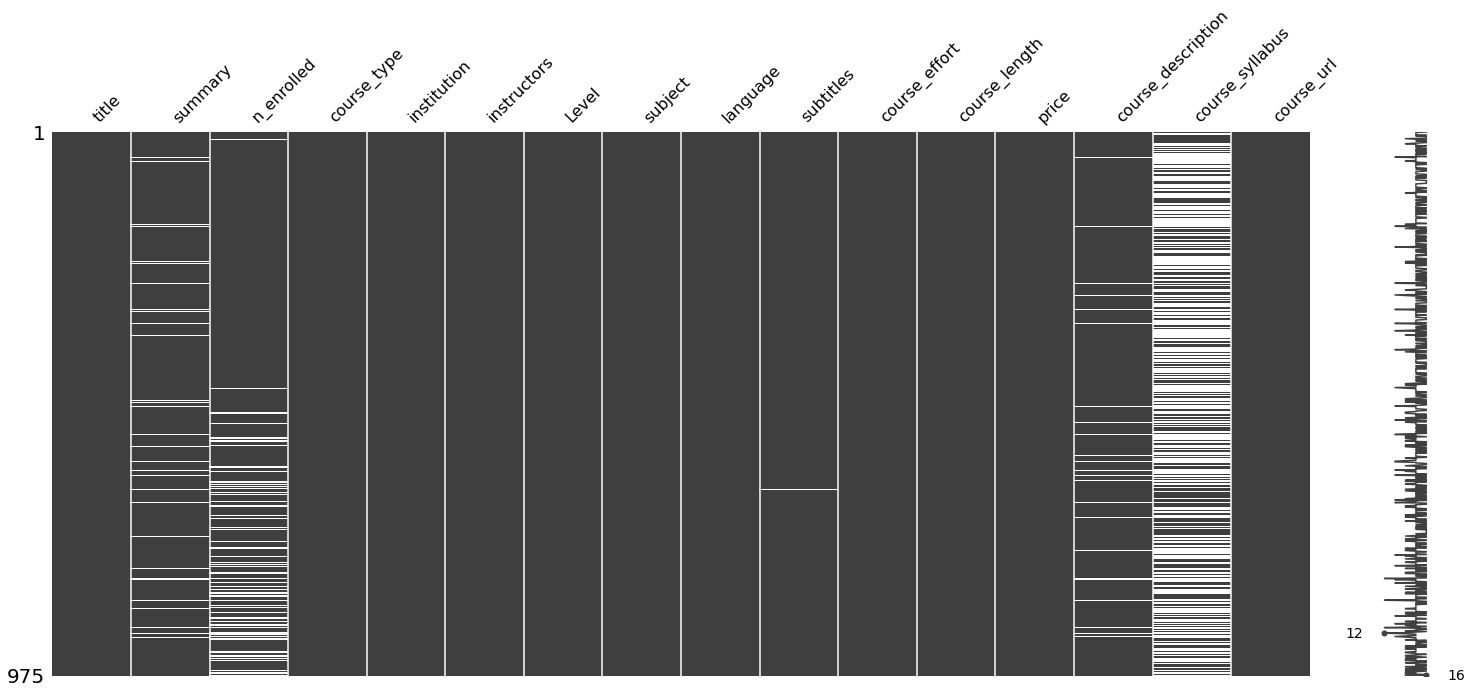

In [358]:
# Tenemos nulos en edx
edx.isna().sum()

# Como los faltantes representan una gran porción de los datos, consideramos mejor no eliminarlos como nulos o remplazarlos. 
# Graficamos para ver relación de faltantes con demás variables. 
msno.matrix(edx)

<AxesSubplot: >

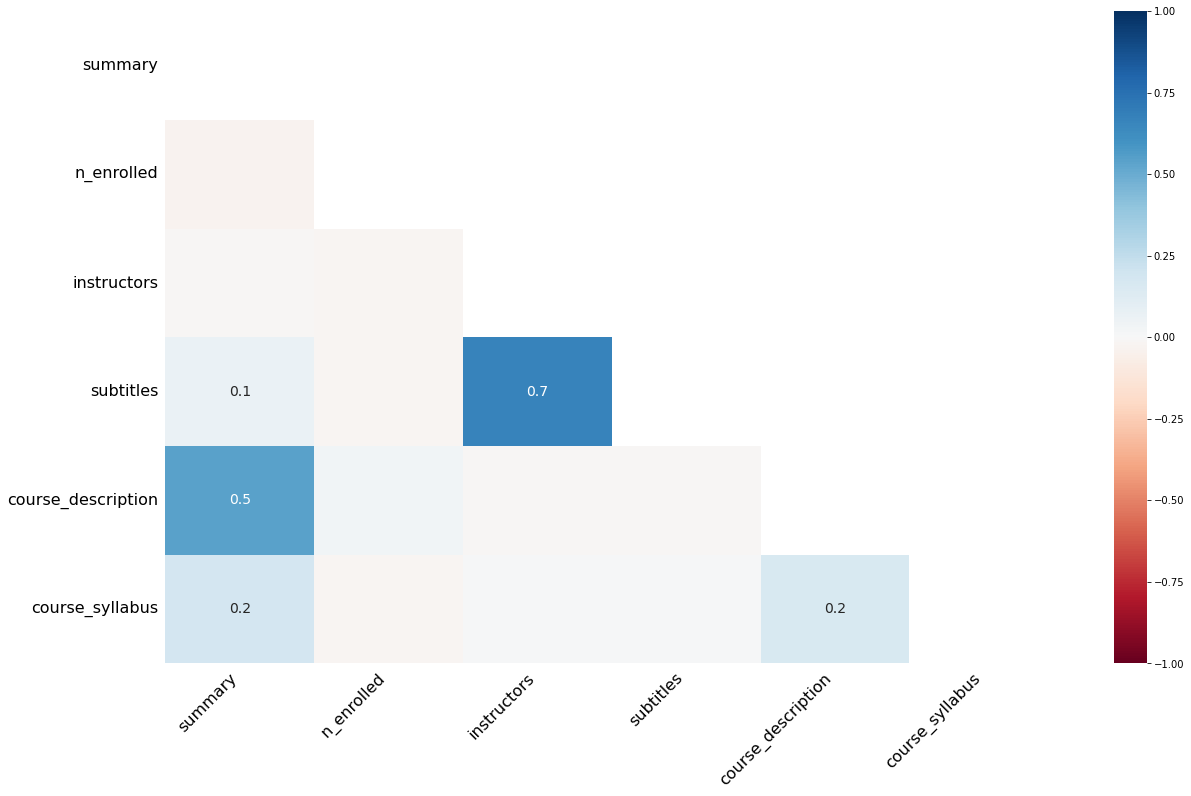

In [359]:
# Validamos la correlación de datos faltantes 
msno.heatmap(edx)

In [360]:
# Notamos que course_syllabus no tiene mucha correlación con los demás faltantes. 
# Procedemos a eliminar la columna. 
edx.drop(['course_syllabus'], axis=1, inplace=True)

# Sin embargo summary se encuentra correlacionado con course_description en la mayoria de los casos faltantes. 
# Vamos a remplazar para no descartarlos por el momento.

edx['summary'].fillna('no data',inplace=True)
edx['course_description'].fillna('no data',inplace=True)

# Vamos a conservar los datos faltantes de n_enrolled ya que representan la cantidad de matriculados. 
edx['n_enrolled'].fillna(0,inplace=True)

# Remplazamos los 3 faltantes de subtitles y instructors
edx['subtitles'].fillna('no data',inplace=True)
edx['instructors'].fillna('no data',inplace=True)

edx.isna().sum()

title                 0
summary               0
n_enrolled            0
course_type           0
institution           0
instructors           0
Level                 0
subject               0
language              0
subtitles             0
course_effort         0
course_length         0
price                 0
course_description    0
course_url            0
dtype: int64

#### Corregimos tipos de datos

In [361]:
coursera_reviews.rating.unique()
 
#Cambiamos tipo de dato a date_reviews y rating
coursera_reviews['rating'] = coursera_reviews['rating'].astype('int32')
coursera_reviews["date_reviews"] = pd.to_datetime(coursera_reviews["date_reviews"])
coursera_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454571 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   reviews       1454571 non-null  object        
 1   reviewers     1454571 non-null  object        
 2   date_reviews  1454571 non-null  datetime64[ns]
 3   rating        1454571 non-null  int32         
 4   course_id     1454571 non-null  object        
dtypes: datetime64[ns](1), int32(1), object(3)
memory usage: 61.0+ MB


In [362]:
mask = edx['price'].str.contains(".")
edx.iloc[433]

title                              Información financiera y su análisis
summary               Aplica fundamentos contables y financieros par...
n_enrolled                                                        5,473
course_type                                     Self-paced on your time
institution                                    Tecnológico de Monterrey
instructors                            Iván Adolfo Valdovinos Hernández
Level                                                          Advanced
subject                                             Economics & Finance
language                                                        Español
subtitles                                                       Español
course_effort                                        5–8 hours per week
course_length                                                   4 Weeks
price                       FREE-Add a Verified Certificate for $49 USD
course_description    Muchas empresas desaparecen por mala admin

In [363]:
# Eliminamos la coma y pasamos a int - n_enrolled

edx['n_enrolled'] = edx['n_enrolled'].replace({',':''}, regex=True)
edx['n_enrolled'] = edx['n_enrolled'].astype('int')

# Eliminamos el string y pasamos a int - price

def clean_string(string): # Creamos función para limpiar caracteres
    return int(re.sub(r'[^\d]', '', string))
edx['price'] = edx['price'].apply(clean_string)

# Modificamos el nombre de las columnas ya que no es el precio del curso si no de la certificación
rename_map = {'price': 'price_certificate'}
# Renombramos las columnas 
edx.rename(columns=rename_map, inplace=True)

# Crear función para dividir la cadena - course_length

def split_string(string):
    match = re.match(r"(\d+)\s*(.*)", string)
    number = int(match.group(1))
    string_part = match.group(2)
    return pd.Series({'duration_week': number, 'col1_string': string_part})
edx = pd.concat([edx, edx['course_length'].apply(split_string)], axis=1)

#Eliminamos columnas
edx.drop(['course_length'], axis=1, inplace=True)
edx.drop(['col1_string'], axis=1, inplace=True)


#### Validamos duplicados

In [364]:
coursera_courses.duplicated().sum() #sin duplicados
coursera_reviews.duplicated(subset=['reviews', 'reviewers', 'course_id']).sum() #duplicados
edx.duplicated().sum() #duplicados
udemy.duplicated().sum() #duplicados


6

In [411]:
# Eliminamos duplicados
coursera_reviews = coursera_reviews.drop_duplicates(subset=['reviews', 'reviewers', 'course_id'],keep='last')
edx = edx.drop_duplicates(keep='last')
udemy = udemy.drop_duplicates(keep='last')


#### Unimos datasets de Coursera

In [366]:
# Unimos uno con las reviews para tener en cuenta más adelante
coursera_rev = coursera_courses.merge(coursera_reviews, on='course_id')

# Unimos otro para dejar la cantidad de reviews y el promedio de rating de cada curso.
reviews_agg = coursera_rev.groupby('course_id').agg({'reviews': 'count', 'rating': 'mean'})

reviews_agg = reviews_agg.rename(columns={'reviews': 'reviews', 'rating': 'avg_rating'})

# Reemplazamos los valores NaN o inf en avg_rating con 0
reviews_agg['avg_rating'].fillna(0, inplace=True)
reviews_agg['avg_rating'].replace([np.inf, -np.inf], 0, inplace=True)

# Reemplazamos los valores NaN o inf en num_reviews con 0
reviews_agg['reviews'].fillna(0, inplace=True)
reviews_agg['reviews'].replace([np.inf, -np.inf], 0, inplace=True)

# Redondeo el promedio del rating a 2 decimales y convertimos el número de reviews a entero
reviews_agg['avg_rating'] = reviews_agg['avg_rating'].round(2)
reviews_agg['reviews'] = reviews_agg['reviews'].astype(int)

# Unimos los dos dataframes en base a la columna 'course_id'
coursera = coursera_courses.merge(reviews_agg, on='course_id', how='left')
coursera


,name,institution,course_url,course_id,reviews,avg_rating
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,12677.0,4.74
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada,1460.0,4.82
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being,8199.0,4.93
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals,12054.0,4.77
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training,33.0,4.82
...,...,...,...,...,...,...
618,Accounting Data Analytics with Python,University of Illinois at Urbana-Champaign,https://www.coursera.org/learn/accounting-data...,accounting-data-analytics-python,8.0,3.50
619,Introduction to Molecular Spectroscopy,University of Manchester,https://www.coursera.org/learn/spectroscopy,spectroscopy,408.0,4.61
620,Managing as a Coach,"University of California, Davis",https://www.coursera.org/learn/managing-as-a-c...,managing-as-a-coach,282.0,4.73
621,The fundamentals of hotel distribution,ESSEC Business School,https://www.coursera.org/learn/hotel-distribution,hotel-distribution,NaN,NaN


#### Exploramos la descripción de los datos y las posibles relaciones

In [367]:
coursera.describe()
# No detectamos outlier de rating
edx.describe()
# puede haber outliers de price
udemy.describe()
# puede haber outliers 

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.672000e+03,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,6.761216e+05,66.102941,3190.586874,156.371460,40.140251,4.097603
std,3.429330e+05,61.035920,9488.105448,936.178649,50.417102,6.057830
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.079370e+05,20.000000,111.750000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,912.000000,18.000000,25.000000,2.000000
75%,9.608140e+05,95.000000,2548.750000,67.000000,46.000000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


<function matplotlib.pyplot.show(close=None, block=None)>

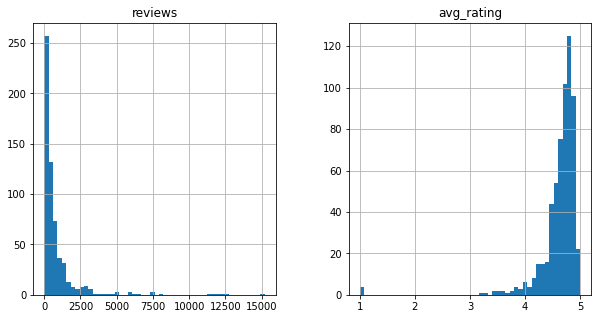

In [368]:
#Plot histograma
coursera.hist(bins = 50, figsize = (10,5))
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

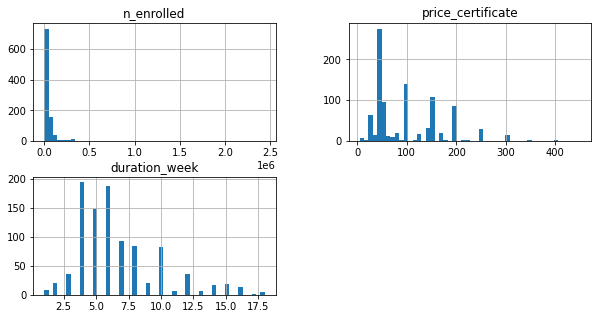

In [369]:
#Plot histograma
edx.hist(bins = 50, figsize = (10,5))
plt.show

/var/folders/vr/lstpy99j3yv9_z9jr_pmd2_w0000gn/T/ipykernel_13354/1884026809.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(edx.corr(method='spearman'), annot=True, fmt='.1g', cmap='coolwarm')


<AxesSubplot: >

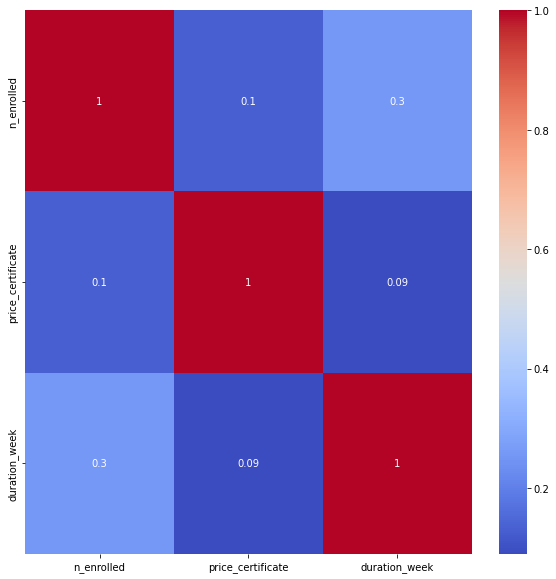

In [370]:
plt.figure(figsize=(10,10))
sns.heatmap(edx.corr(method='spearman'), annot=True, fmt='.1g', cmap='coolwarm')

La duración es totalmente proporcional con el precio. 

<function matplotlib.pyplot.show(close=None, block=None)>

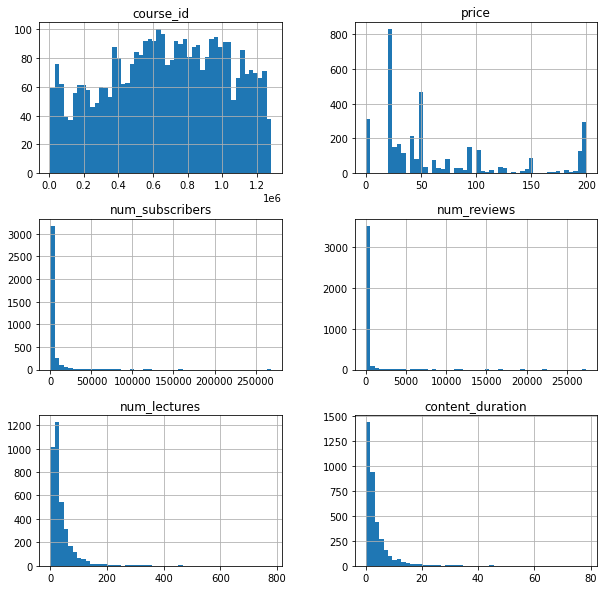

In [412]:
#Plot histograma
udemy.hist(bins = 50, figsize = (10,10))
plt.show

/var/folders/vr/lstpy99j3yv9_z9jr_pmd2_w0000gn/T/ipykernel_13354/4131112630.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(udemy.corr(method='spearman'), annot=True, fmt='.1g', cmap='coolwarm')


<AxesSubplot: >

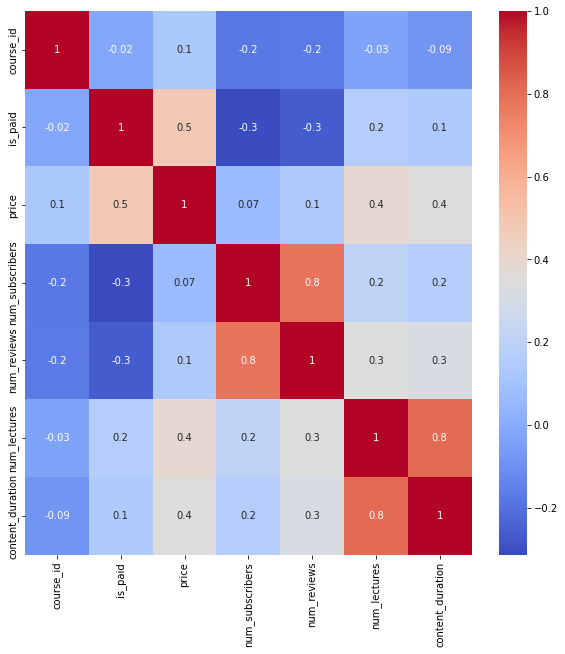

In [413]:
plt.figure(figsize=(10,10))
sns.heatmap(udemy.corr(method='spearman'), annot=True, fmt='.1g', cmap='coolwarm')

La cantidad de reviews es totalmente proporcional con el numero de subscribers. Y la cantidad de lectures es proporcional a la duración del curso. 

#### Outliers

In [373]:
#Buscamos outliers en coursera
coursera.reviews.describe()
coursera.avg_rating.describe()


count    604.000000
mean       4.619851
std        0.394390
min        1.000000
25%        4.550000
50%        4.720000
75%        4.812500
max        5.000000
Name: avg_rating, dtype: float64

In [374]:
# Buscamos outliers en edx. En coursera no se detecto ninguno ya que tiene pocas variables numéricas.
edx.price_certificate.describe()
edx.duration_week.describe()
edx.n_enrolled.describe()

count    9.740000e+02
mean     4.665329e+04
std      1.128702e+05
min      0.000000e+00
25%      8.523250e+03
50%      1.965050e+04
75%      4.880900e+04
max      2.442271e+06
Name: n_enrolled, dtype: float64

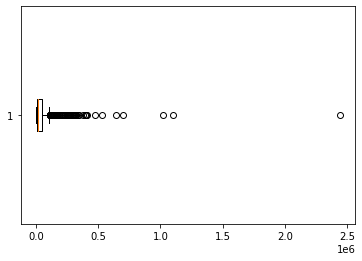

In [375]:
# Detectamos un outlier en n_enrolled
plt.boxplot(edx["n_enrolled"], vert=False)
# Mostrar el gráfico
plt.show()

In [376]:
# Ordeno para detectar el siguiente valor en el rango normal
enrolled = edx.sort_values('n_enrolled',ascending=False)
enrolled.head(10)
max = enrolled.n_enrolled.loc[48]

# Remplazamos
edx["n_enrolled"] = edx["n_enrolled"].apply(lambda x: max if x > max else x)


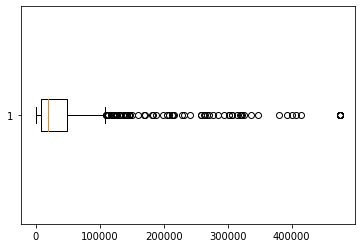

In [377]:
# Graficamos de nuevo
plt.boxplot(edx["n_enrolled"], vert=False)
plt.show()

In [378]:
# Buscamos outliers en udemy
udemy.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.672000e+03,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,6.761216e+05,66.102941,3190.586874,156.371460,40.140251,4.097603
std,3.429330e+05,61.035920,9488.105448,936.178649,50.417102,6.057830
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.079370e+05,20.000000,111.750000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,912.000000,18.000000,25.000000,2.000000
75%,9.608140e+05,95.000000,2548.750000,67.000000,46.000000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


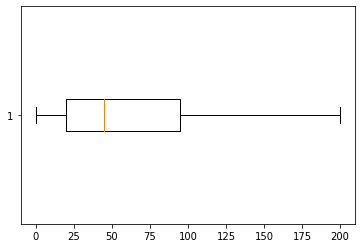

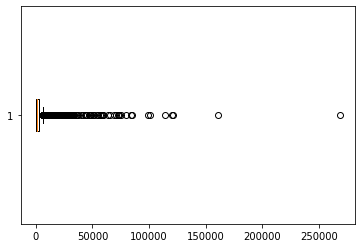

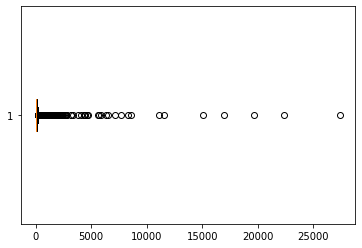

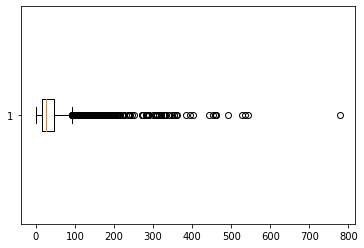

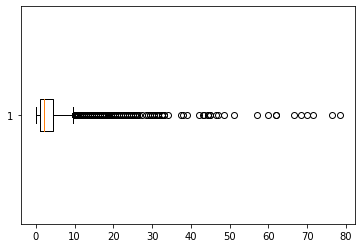

In [414]:
# Price se encuentra en rangos normales.
plt.boxplot(udemy["price"], vert=False)
plt.show() 

# num_subscribers tiene outliers - ploteamos para detectarlo mejor 
plt.boxplot(udemy["num_subscribers"], vert=False)
plt.show()

# La cantidad de reviews esta altamente relacionada con la cantidad de subscriptores al curso por lo que no vamos a eliminar sus outliers. 
plt.boxplot(udemy["num_reviews"], vert=False)
plt.show()

# num_lectures y content_duration no se detectan outliers significantes
plt.boxplot(udemy["num_lectures"], vert=False)
plt.show()
plt.boxplot(udemy["content_duration"], vert=False)
plt.show()
	
	

num_subscribers

In [415]:
# Ordeno para detectar el siguiente valor en el rango normal
subscribers = udemy.sort_values('num_subscribers',ascending=False)
subscribers.head(10)
max = subscribers.num_subscribers.loc[3230]

# Remplazamos 
udemy["num_subscribers"] = udemy["num_subscribers"].apply(lambda x: max if x > max else x)


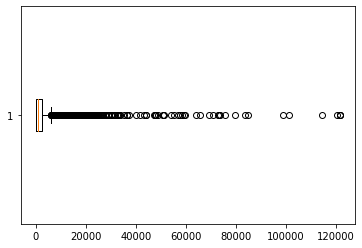

In [417]:
#Validamos outliers
plt.boxplot(udemy["num_subscribers"], vert=False)
plt.show()

#### Agregamos el idioma del curso en el dataset Coursera, con relación a su review

In [382]:
coursera_rev_drop = coursera_rev.drop_duplicates(subset='course_id')
coursera_rev_drop.shape

(604, 8)

In [383]:
from langdetect import detect

columna = coursera_rev_drop['reviews']

resultados = []

for texto in columna:
    try:
        idioma = detect(texto)
        resultados.append(idioma)
    except:
        resultados.append(None)

coursera_rev_drop['language'] = resultados


/var/folders/vr/lstpy99j3yv9_z9jr_pmd2_w0000gn/T/ipykernel_13354/2705829793.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coursera_rev_drop['language'] = resultados


In [384]:
coursera_rev_drop = coursera_rev_drop[{'course_id','language'}]


/var/folders/vr/lstpy99j3yv9_z9jr_pmd2_w0000gn/T/ipykernel_13354/4157681541.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  coursera_rev_drop = coursera_rev_drop[{'course_id','language'}]


In [ ]:
# Unimos los dos dataframes en base a la columna 'course_id'
coursera = coursera.merge(coursera_rev_drop, on='course_id')
coursera

#### Creamos un dataset que uninfique los course_id

In [418]:
# Le creo un index a edx
edx['course_id'] = edx.index

# Estandarizamos nombre de title, nombre y course_title
rename_map = {'name': 'title'}
coursera.rename(columns=rename_map, inplace=True)

rename_map = {'course_title': 'title'}
udemy.rename(columns=rename_map, inplace=True)

In [387]:
# Creo lista con datos de cada plataforma y luego las unimos 
list_coursera = coursera.loc[:, ['course_id', 'title']]
list_edx = edx.loc[:,['course_id', 'title']]
list_udemy = udemy.loc[:,['course_id', 'title']]

list_coursera['platform'] = 'c'
list_edx['platform'] = 'e'
list_udemy['platform'] = 'u'

In [429]:
list_coursera['subscribers'] = coursera.loc[:, ['reviews']]
list_edx['subscribers'] = edx.loc[:,['n_enrolled']]
list_udemy['subscribers'] = udemy.loc[:,['num_subscribers']]

In [430]:
moocs = pd.concat([list_coursera, list_edx, list_udemy])

In [389]:
coursera.reviews = pd.to_numeric(coursera.reviews, downcast='integer')

In [390]:
# Antes de importar quito saltos de lineas para no generar un error a la hora de exportar el csv
edx['summary'] = edx['summary'].str.replace('\n', ' ')
edx['course_description'] = edx['course_description'].str.replace('\n', ' ')

In [ ]:
# Eliminamos comillas que generan errores al generar el csv
udemy['title'] = udemy['title'].str.replace('"','')

In [431]:
moocs.to_csv('datasets-pb/moocs.csv', index=False)
coursera.to_csv('datasets-pb/coursera.csv', index=True)
coursera_rev.to_csv('datasets-pb/coursera_rev.csv', index=True)
edx.to_csv('datasets-pb/edx.csv', index=True, sep=',')
udemy.to_csv('datasets-pb/udemy.csv', index=False, sep=',')

WORDCLOUD

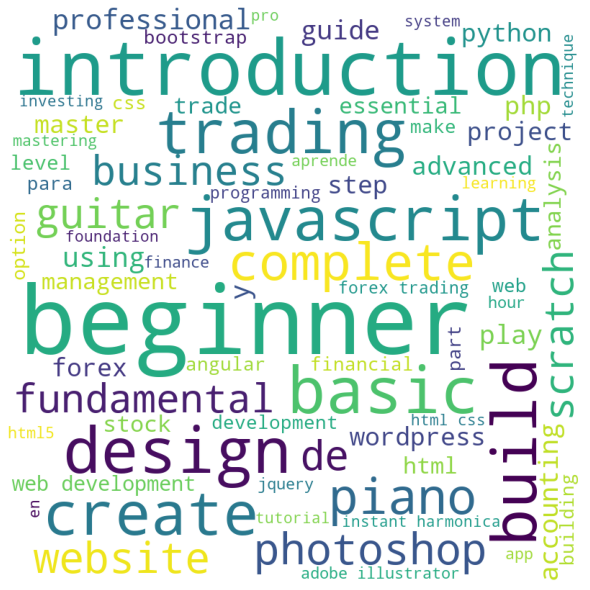

In [424]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in moocs.title:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
stopwords.add('course')
stopwords.add('learn')

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                max_words=70,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Con la wordcloud podemos detectar que la mayoria de cursos ofrecidos corresponde a principiantes, a introducción o inicio de un tema en particular. Son los cursos más ofrecidos. 

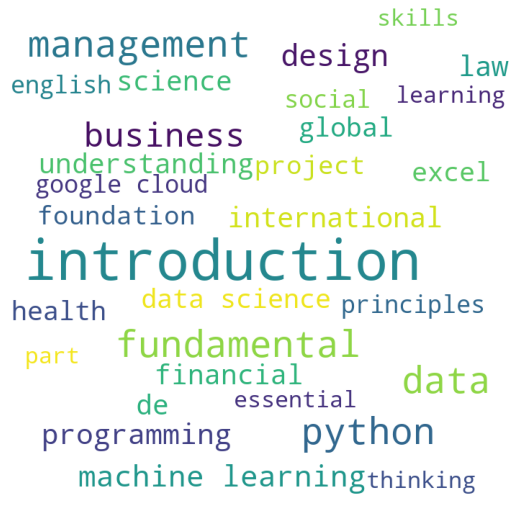

In [404]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in coursera.title:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                max_words=30, 
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()